This notebook provides a guide to visualize the results. You can directly run it since we have prepared all log files.

If you want to replace the logs with your own running results, please follow the instruction from [this link](https://github.com/chongminggao/DORL-codes#Reproduce-the-results-of-the-paper).

---
#### Visualize Figure 7 in the paper

Note the logs for this visualization are generated by `../scripts/run_main.sh`.

In [1]:
import os
from matplotlib import pyplot as plt
from visual_utils import walk_paths, organize_df, loaddata, create_dir
from visual_main_figure import remove_redundent, visual4, combile_two_tables

import warnings
warnings.simplefilter('ignore')

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

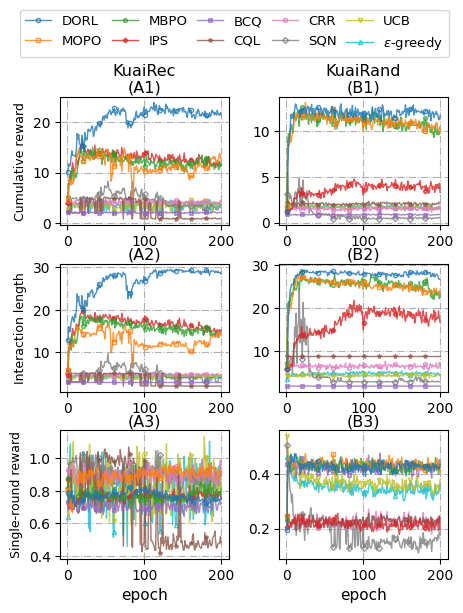

done!
latex tex file produced!


In [2]:
save_fig_dir = "figures"

create_dirs = [save_fig_dir]
create_dir(create_dirs)

dirpath = "./results_all"

ways = {'FB', 'NX_0_', 'NX_10_'}
metrics = {'ctr', 'len_tra', 'R_tra', 'ifeat_feat'}

result_dir1 = os.path.join(dirpath, "kuairec")
filenames = walk_paths(result_dir1)
dfs1 = loaddata(result_dir1, filenames)
df1 = organize_df(dfs1, ways, metrics)

result_dir2 = os.path.join(dirpath, "kuairand")
filenames = walk_paths(result_dir2)
dfs2 = loaddata(result_dir2, filenames)
df2 = organize_df(dfs2, ways, metrics)

remove_redundent(df1, level=2)
remove_redundent(df2, level=2)

savename = "main_result"

way = "NX_0_"
df1_one, df2_one = df1[way], df2[way]

visual4(df1_one, df2_one, save_fig_dir, savename=savename)
combile_two_tables(df1, df2, used_way="No Overlapping", save_fig_dir=save_fig_dir, savename=savename)

---
#### Visualize Figure 9 in the paper

Note the logs for this visualization are generated by `../scripts/script_leave.sh`.

Loading logs...
Transform data...
Producing the figure...


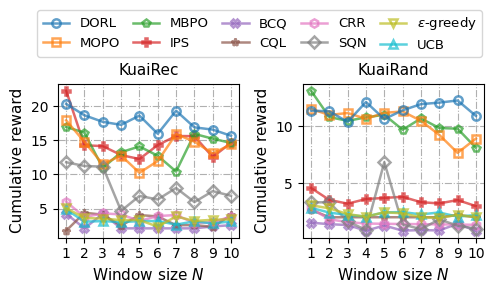

Figure rendered.


In [3]:
from visual_leave import visual_leave_threshold, group_data
save_fig_dir = "figures"

print("Loading logs...")
dir1 = os.path.join(".", "results_leave", "kuairec")
filenames1 = walk_paths(dir1)
df1 = loaddata(dir1, filenames1)

dir2 = os.path.join(".", "results_leave", "kuairand")
filenames2 = walk_paths(dir2)
df2 = loaddata(dir2, filenames2)

print("Transform data...")
ways = {"FB", "NX_0_", "NX_10_"}
metrics={'ctr', 'len_tra', 'R_tra',  'CV', 'CV_turn', 'ifeat_feat'}

df_kuaishou = organize_df(df1, ways, metrics)
df_kuairand = organize_df(df2, ways, metrics)

df_ks = df_kuaishou['NX_0_']
df_kr = df_kuairand['NX_0_']

df_ks_grouped = group_data(df_ks, group_feat="R_tra")
df_kr_grouped = group_data(df_kr, group_feat="R_tra")

print("Producing the figure...")
visual_leave_threshold(df_ks_grouped, df_kr_grouped, save_fig_dir, savename="leave")
print("Figure rendered.")

---
#### All figures and tables are saved under `./figures`.